## Vaccines Sales Data Analysis
Data Analysis is the process of systematically applying statistical and/or logical techniques to describe and illustrate, condense and recap, and evaluate data. It is done after data exploration and cleaning. When we do data analysis we answer questions corresponding to our dataset.

In [1]:

# Load in some packages
import calendar
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# load the datasets
vc_sales_df = pd.read_excel(r"C:\Users\jki\Downloads\4 Vaccine Sales Data\vaccine sales datase.xlsx")
vc_sales_df.head(10)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6,June,2014
5,Government,Germany,Carretera,None,1513.0,3,350,529550.0,0.0,529550.0,393380.0,136170.0,2014-12-01,12,December,2014
6,Midmarket,Germany,Montana,None,921.0,5,15,13815.0,0.0,13815.0,9210.0,4605.0,2014-03-01,3,March,2014
7,Channel Partners,Canada,Montana,None,2518.0,5,12,30216.0,0.0,30216.0,7554.0,22662.0,2014-06-01,6,June,2014
8,Government,France,Montana,None,1899.0,5,20,37980.0,0.0,37980.0,18990.0,18990.0,2014-06-01,6,June,2014
9,Channel Partners,Germany,Montana,None,1545.0,5,12,18540.0,0.0,18540.0,4635.0,13905.0,2014-06-01,6,June,2014


In [2]:
# lets check of we have missing values
missing_values = vc_sales_df.isna().sum()
print(missing_values)

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
 Sales                 0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64


In [3]:
# let have a look at the data types
vc_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        700 non-null    object        
 4   Units Sold           700 non-null    float64       
 5   Manufacturing Price  700 non-null    int64         
 6   Sale Price           700 non-null    int64         
 7   Gross Sales          700 non-null    float64       
 8   Discounts            700 non-null    float64       
 9    Sales               700 non-null    float64       
 10  COGS                 700 non-null    float64       
 11  Profit               700 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

In [4]:
# let have a look at the stastistical summary
vc_sales_df.describe()

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Year
count,700.000000,700.000000,700.000000,7.000000e+02,700.000000,7.000000e+02,700.000000,700.000000,700.000000,700.000000
mean,1608.294286,96.477143,118.428571,1.827594e+05,13150.354629,1.696091e+05,145475.211429,24133.860371,7.900000,2013.750000
std,867.427859,108.602612,136.775515,2.542623e+05,22962.928775,2.367263e+05,203865.506118,42760.626563,3.377321,0.433322
min,200.000000,3.000000,7.000000,1.799000e+03,0.000000,1.655080e+03,918.000000,-40617.500000,1.000000,2013.000000
25%,905.000000,5.000000,12.000000,1.739175e+04,800.320000,1.592800e+04,7490.000000,2805.960000,5.750000,2013.750000
50%,1542.500000,10.000000,20.000000,3.798000e+04,2585.250000,3.554020e+04,22506.250000,9242.200000,9.000000,2014.000000
75%,2229.125000,250.000000,300.000000,2.790250e+05,15956.343750,2.610775e+05,245607.500000,22662.000000,10.250000,2014.000000
max,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,12.000000,2014.000000


## 1. What was the best month for sales? How much was earned that month?

In [5]:

# Load in some packages
import calendar
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

warnings.filterwarnings("ignore")

unique_Months = vc_sales_df['Month Number'].apply(lambda x: calendar.month_abbr[x]).unique() # Take all 12 months' names
Sales_by_month = vc_sales_df.groupby('Month Number').sum()['Gross Sales'] # Take the highest number of sales for each month
     


Let's see which month had the highest number of sales with a bar graph:

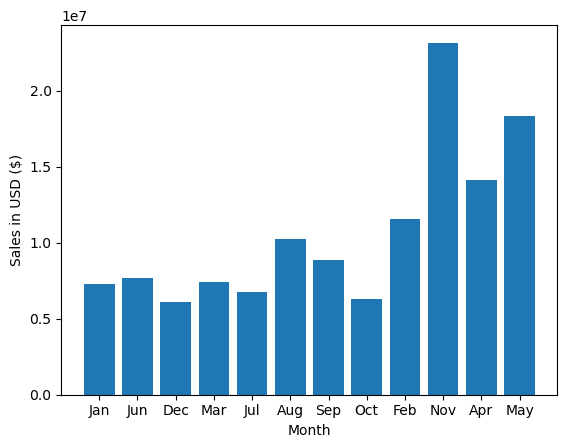

In [6]:
# Plot the highest number of sales for each month
plt.bar(unique_Months, Sales_by_month)
plt.xticks(unique_Months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.show()
     

## 1.Which Product had the highest number of sales?

In order to answer this question we need to get all unique Product and the number of sales of each city:

In [8]:
Sales_by_Product = vc_sales_df.groupby('Product').sum()['Gross Sales'] # Take the number of sales for each Poduct
unique_Product = vc_sales_df.groupby('Product').sum().index # Take all Product

Let's see which product had the highest number of sales with a bar graph:

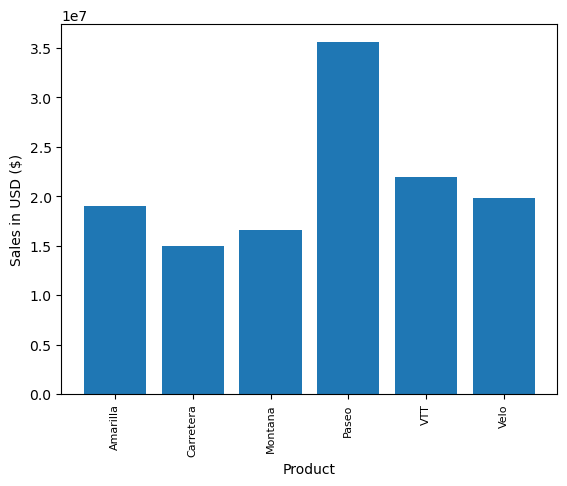

In [9]:

# Plot the highest number of sales for each city
plt.bar(unique_Product, Sales_by_Product)
plt.xticks(unique_Product, rotation = 90, size = 8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Product')
plt.show()

##  2.Which Segment had the highest number of sales?



In order to answer this question we need to get all unique Segment and the number of sales of each Segment:

In [16]:

Sales_by_Segment = vc_sales_df.groupby('Segment').sum()['Gross Sales'] # Take the number of sales for each Segemnt
unique_Segment = vc_sales_df.groupby('Segment').sum().index # Take all Segment

Let's see which Segement had the highest number of sales with a bar graph:

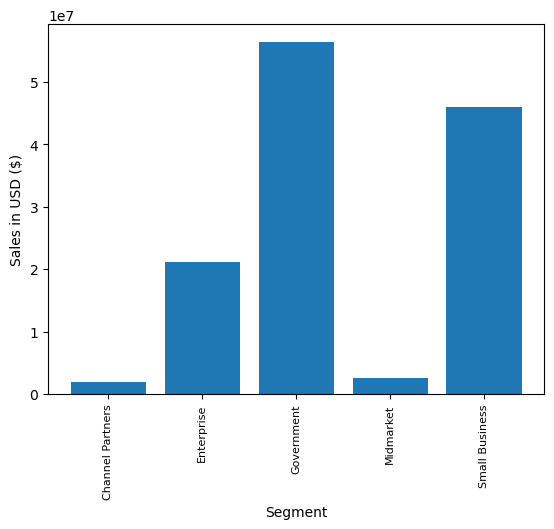

In [17]:
# Plot the highest number of sales for each city
plt.bar(unique_Segment, Sales_by_Segment)
plt.xticks(unique_Segement, rotation = 90, size = 8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Segment')
plt.show()
     

We can see government was the biggest buyer of vaccines

## 3.Which Country had the highest number of sales

In order to answer this question we need to get all unique Country and the number of sales of each Country:

In [18]:
Sales_by_country = vc_sales_df.groupby('Country').sum()['Gross Sales'] # Take the number of sales for each Country
unique_Countries = vc_sales_df.groupby('Country').sum().index # Take all countries

Let's see which country had the highest number of sales with a bar graph:

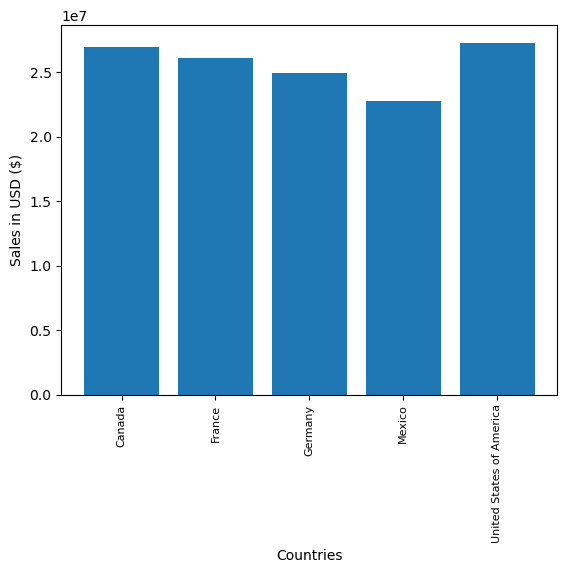

In [19]:
# Plot the highest number of sales for each city
plt.bar(unique_Countries, Sales_by_country)
plt.xticks(unique_Countries, rotation = 90, size = 8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Countries')
plt.show()

We see that United States had the most sales.



## 4. What product sold the most? Why do you think it sold the most?


In order to answer this question We just need to sum up the Quantity Ordered based on Grouped Products:



In [22]:

unique_Products = vc_sales_df.groupby('Product').sum().index
Quantity_Ordered_by_product = vc_sales_df.groupby('Product').sum()['Units Sold']

Let's see the product with the most quantity order with a bar graph:

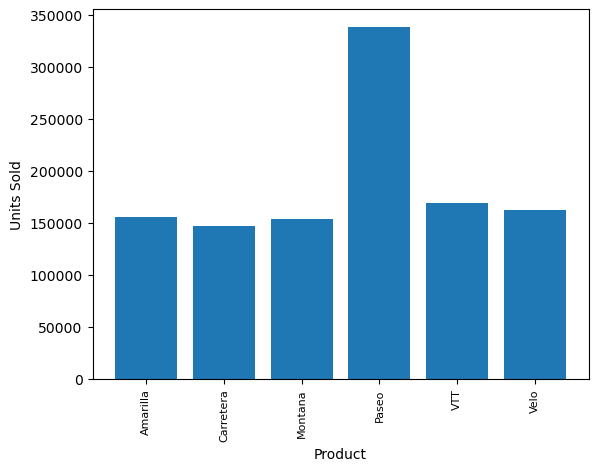

In [23]:

# Plot the quantity ordered for each product
plt.bar(unique_Products, Quantity_Ordered_by_product)
plt.xticks(unique_Products, rotation = 90, size = 8)
plt.ylabel('Units Sold')
plt.xlabel('Product')
plt.show()
     

The Paseo, had the most quantity sales of all products One reasonable explanation would be they are cheap   Let's test this theory:

In [24]:
Prices_of_products = vc_sales_df.groupby('Product').mean()['Units Sold']
Prices_of_products

Product
Amarilla     1652.287234
Carretera    1578.989247
Montana      1658.043011
Paseo        1674.452970
VTT          1548.467890
Velo         1490.133028
Name: Units Sold, dtype: float64

Let's combine Quantity Ordered and Prices, along with the coresponding Products in one graph:

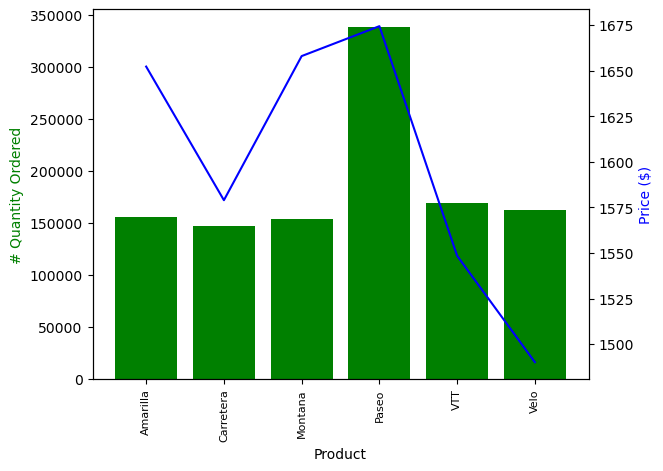

In [25]:

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(unique_Products, Quantity_Ordered_by_product, color = 'g')
ax2.plot(unique_Products, Prices_of_products, color = 'b')

ax1.set_xlabel('Product')
ax1.set_ylabel('# Quantity Ordered', color = 'g')
ax2.set_ylabel('Price ($)', color = 'b')

ax1.set_xticklabels(unique_Products, rotation = 90, size = 8)
plt.show()

Paseo is the most sold despite highest price ,this could be beacuse of  highes quality